# Introduction
### Yet Another Lending Club Model :)
### I'm currently enrolled in Udemy's Python for Data science course - this is my assigned capstone project for the Deep Learning Module. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Data

In [2]:
df_info = pd.read_csv('lending_club_info.csv')
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
def full_info(title):
    return df_info[df_info['LoanStatNew']==title].Description

In [7]:
full_info('term')

1    The number of payments on the loan. Values are...
Name: Description, dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [9]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

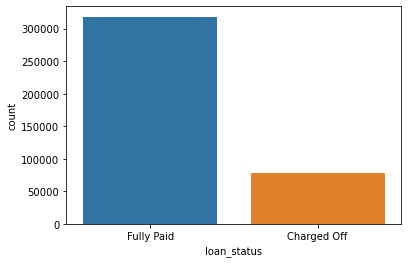

In [10]:
sns.countplot(x='loan_status', data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

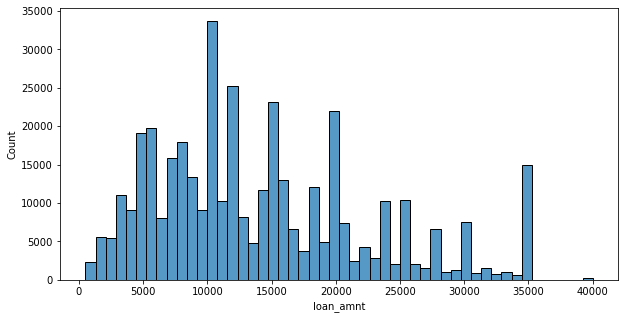

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(x='loan_amnt',data=df, bins=50)

<AxesSubplot:xlabel='grade', ylabel='count'>

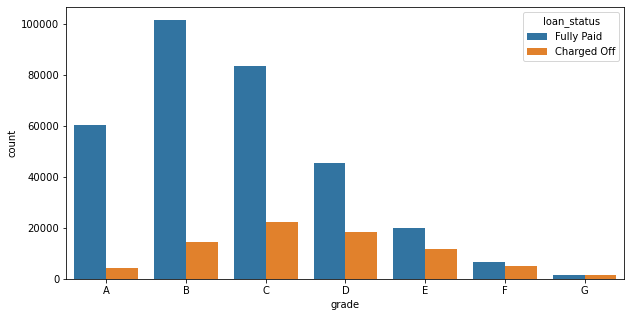

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=df, hue='loan_status', order=np.sort(df['grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

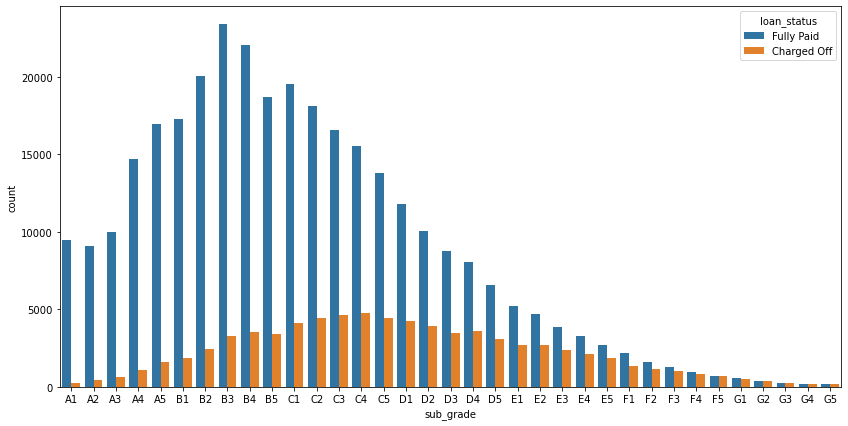

In [13]:
plt.figure(figsize=(14,7))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=np.sort(df['sub_grade'].unique()))

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

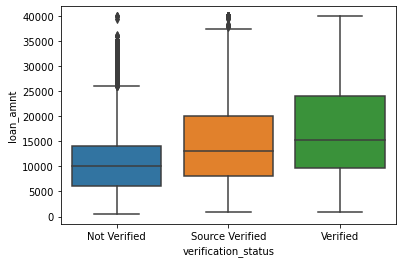

In [14]:
sns.boxplot(x='verification_status', y ='loan_amnt', data=df)

In [15]:
def repayment_status(var):
    if var=='Fully Paid':
        return 1
    else:
        return 0

In [16]:
df['Target'] = df['loan_status'].apply(repayment_status)

In [17]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Target
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [18]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,Target
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.059836
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.247758
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.041082
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.053432
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,-0.062413
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.028012
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.019933
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.010892
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.082373
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.017893


<AxesSubplot:>

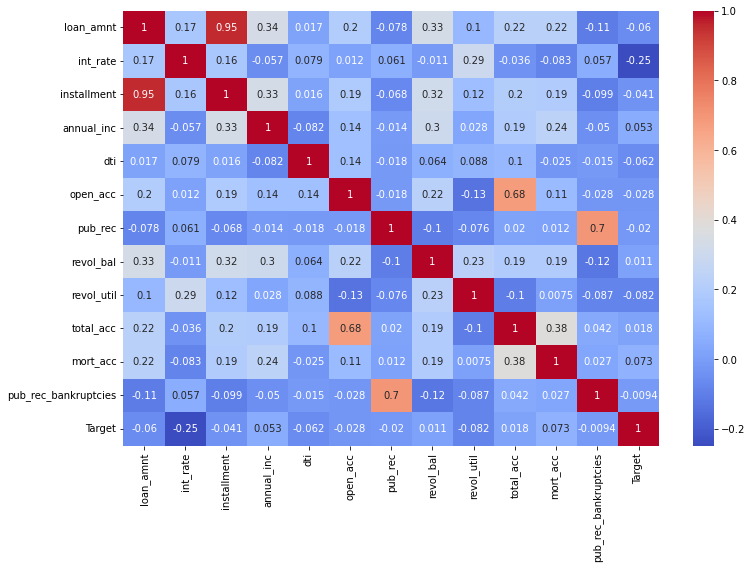

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

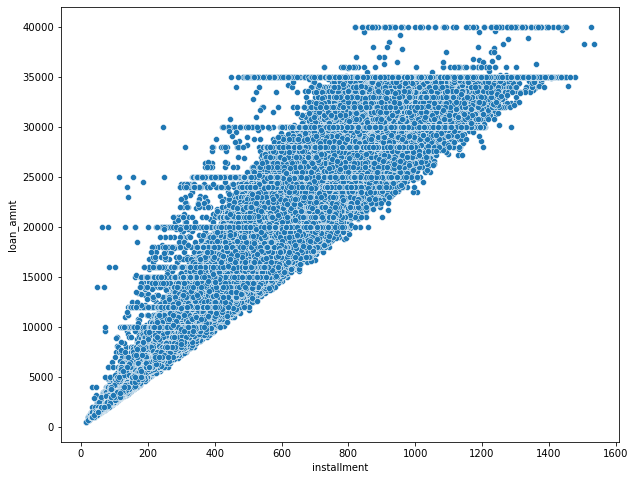

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='installment',y='loan_amnt', data=df)

<AxesSubplot:xlabel='open_acc', ylabel='total_acc'>

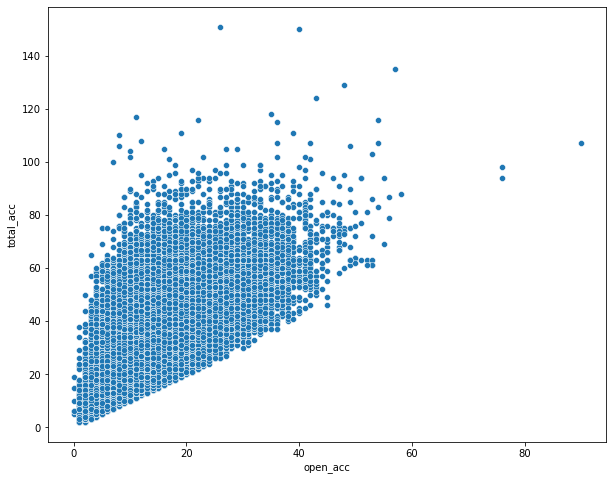

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='open_acc',y='total_acc', data=df)

In [22]:
df.corr()['Target']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
Target                  1.000000
Name: Target, dtype: float64

<AxesSubplot:>

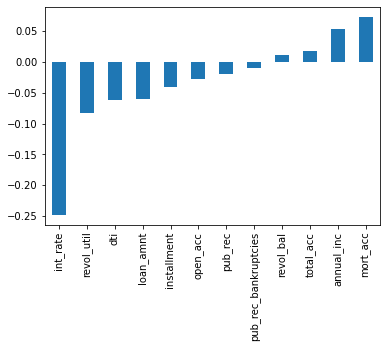

In [23]:
df.corr()['Target'].drop('Target').sort_values().plot(kind='bar')

### Preparing The Data
#### Handling Missing Data and Dummifying Categorical Variables

In [24]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Target                      0
dtype: int64

In [25]:
full_info('emp_title')

6    The job title supplied by the Borrower when ap...
Name: Description, dtype: object

In [26]:
df['emp_title'].nunique()

173105

#### Emp_title has a lot of unique values that it wouldn't be feasible to dummify them. And it also has several null entries, so we'll go ahead and drop the column

In [27]:
df.drop('emp_title', axis=1, inplace=True)

In [28]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Target                      0
dtype: int64

In [29]:
df['emp_length'].nunique()

11

<AxesSubplot:xlabel='emp_length', ylabel='count'>

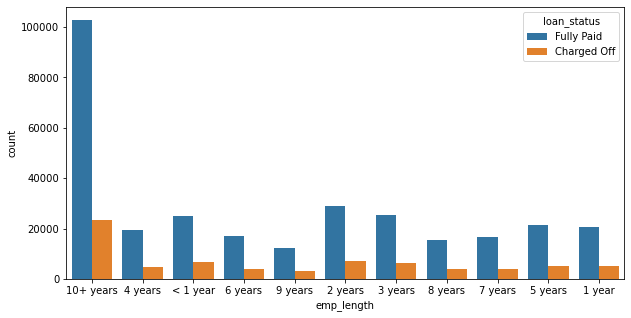

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', hue='loan_status',data=df)

#### We want to know if emp_length influences whether a borrower will default or not, the above chart does not make that very clear. To get a clearer picture, we try and plot the percentage of defaulters per category.

In [31]:
x = df['emp_length'].value_counts()
y=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
c=(y/x)*100
c

1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
dtype: float64

<AxesSubplot:>

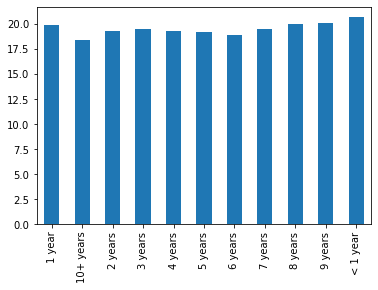

In [32]:
c.plot(kind='bar')

#### From the above plot, we see that emp_length do not particulary influence default rate as defauters are evenly spread across all categories. Thus, we'll drop the emp_length

In [33]:
df.drop('emp_length', axis=1, inplace=True)

In [34]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Target                      0
dtype: int64

In [35]:
df['title'].nunique()

48817

In [36]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


#### We'll drop the title column mainly because it is just a repitition of the purpose column. Later on, we'll evaluate the purpose column itself.

In [37]:
df.drop('title',axis=1,inplace=True)

In [38]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Target                      0
dtype: int64

In [39]:
full_info('mort_acc')

26    Number of mortgage accounts.
Name: Description, dtype: object

In [40]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Target                  0.073111
Name: mort_acc, dtype: float64

#### The mort_acc is correlated with the total_acc column. We'll attempt to fill out an estimate of the missing values using their corresponding total_acc value

In [41]:
z=df.groupby('total_acc').mean()['mort_acc']
def fill_mort(a,b):
    if np.isnan(b):
        b=z[a]
        return b
    else:
        return b
        

In [42]:
df['mort_acc']= df.apply(lambda x: fill_mort(x['total_acc'], x['mort_acc']),axis=1)

In [43]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
Target                    0
dtype: int64

In [44]:
full_info('revol_util')

22    Revolving line utilization rate, or the amount...
Name: Description, dtype: object

In [45]:
full_info('pub_rec_bankruptcies')

27    Number of public record bankruptcies
Name: Description, dtype: object

In [46]:
(df.isna().sum())/len(df) *100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
Target                  0.000000
dtype: float64

#### The percentage of missing values of both 'revol_util' and 'pub_rec_bankruptcies' columns is just over 0.1% of the entire dataset  and thus negligible. We can go ahead and drop the rows with missing values.

In [47]:
df.dropna(inplace=True)

In [48]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
Target                  0
dtype: int64

#### Pandas for Dummies.

In [49]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [50]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [51]:
df['term']=df['term'].apply(lambda x:x[:3])

In [52]:
df['term']=df['term'].astype(int)

In [53]:
df.select_dtypes(include='object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### The sub-grade column is derived from the grade column and more specific. We'll drop the Grade column and dummify the sub-grade column.

In [54]:
df.drop('grade', axis=1, inplace=True)

In [55]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [56]:
sg = pd.get_dummies(df['sub_grade'], drop_first =True)

In [57]:
df=pd.concat([df,sg], axis=1)

In [58]:
df.drop('sub_grade', axis=1, inplace=True)

In [59]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [60]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [61]:
#Other, Any and None can ideally be in the same category. We'll combine the three into one

In [62]:
def change(x):
    if x=='ANY' or x=='NONE':
        x='OTHER'
        return x
    return x

In [63]:
df['home_ownership']=df['home_ownership'].apply(change)

In [64]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [65]:
ho=pd.get_dummies(df['home_ownership'],drop_first=True)

In [66]:
df=pd.concat([df,ho],axis=1)

In [67]:
df.drop('home_ownership',axis=1,inplace=True)

In [68]:
df.select_dtypes(include='object').columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [69]:
print(df['verification_status'].unique())
print(df['purpose'].unique())
print(df['application_type'].unique())
print(df['initial_list_status'].unique())

['Not Verified' 'Source Verified' 'Verified']
['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
['w' 'f']


In [70]:
#We'll dummify these four columns at once
agg = pd.get_dummies(df[['verification_status','purpose','application_type','initial_list_status']], drop_first=True)

In [71]:
agg

,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
396026,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
396027,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
396028,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [72]:
df=pd.concat([df,agg],axis=1)

In [73]:
df.drop(['verification_status','purpose','application_type','initial_list_status'],axis=1,inplace=True)

In [74]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [75]:
full_info('issue_d')

11    The month which the loan was funded
Name: Description, dtype: object

#### We'll remove this column from the dataset as it cannot be used to train the model because at the time of prediction, the loan has not been funded.

In [76]:
df.drop('issue_d',axis=1,inplace=True)

In [77]:
df.select_dtypes(include='object').columns

Index(['loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [78]:
#WE drop loan_status column as that has already been translated into the Target column
df.drop('loan_status',axis=1,inplace=True)

In [79]:
df.select_dtypes(include='object').columns

Index(['earliest_cr_line', 'address'], dtype='object')

In [80]:
full_info('earliest_cr_line')

18    The month the borrower's earliest reported cre...
Name: Description, dtype: object

In [81]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [82]:
#Rather than dummify,we'll transform the column into a year column with integer values
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda x:x[-4:])

In [83]:
df['earliest_cr_line']=df['earliest_cr_line'].astype(int)

In [84]:
df.select_dtypes(include='object').columns

Index(['address'], dtype='object')

In [85]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [86]:
#We'll extract the zip code from the address column and use that to train the model

In [87]:
df['zip_code']=df['address'].apply(lambda x:x[-5:])

In [88]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [89]:
df.drop('address',axis=1,inplace=True)

In [90]:
zc=pd.get_dummies(df['zip_code'],drop_first=True)

In [91]:
df=pd.concat([df,zc],axis=1)

In [92]:
df.drop('zip_code',axis=1,inplace=True)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'Target', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w', '05113', '11650',
       '22690', '2

In [94]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

### Splitting the Dataset

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X=df.drop('Target',axis=1)
y=df['Target']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

### Normalizing the Data

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler=MinMaxScaler()

In [100]:
X_train=scaler.fit_transform(X_train)

In [101]:
X_test=scaler.transform(X_test)

### Training the Model

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [103]:
model = Sequential()

#Input Layer
model.add(Dense(80, Activation('relu')))
model.add(Dropout(0.2))

#Hidden Layers
model.add(Dense(40, Activation('relu')))
model.add(Dropout(0.2))
model.add(Dense(20, Activation('relu')))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(1, Activation('sigmoid')))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [104]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=32,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/32
1236/1236 [==============================] - 8s 5ms/step - loss: 0.2984 - val_loss: 0.2639
Epoch 2/32
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2659 - val_loss: 0.2601
Epoch 3/32
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2633 - val_loss: 0.2596
Epoch 4/32
1236/1236 [==============================] - 8s 7ms/step - loss: 0.2622 - val_loss: 0.2592
Epoch 5/32
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2617 - val_loss: 0.2591
Epoch 6/32
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2610 - val_loss: 0.2586
Epoch 7/32
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2605 - val_loss: 0.2594
Epoch 8/32
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2603 - val_loss: 0.2588
Epoch 9/32
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2600 - val_loss: 0.2585
Epoch 10/32
1236/1236 [==============================] - 8s 7ms/step - loss: 0.259

### Evaluating Model Performance

<AxesSubplot:>

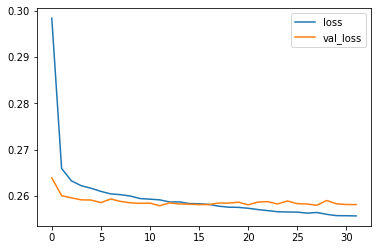

In [105]:
losses=pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
predictions=(model.predict(X_test)>0.5).astype('int32')

2471/2471 [==============================] - 5s 2ms/step


In [108]:
print(confusion_matrix(y_test,predictions))

[[ 7056  8437]
 [  330 63221]]


In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15493
           1       0.88      0.99      0.94     63551

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



### Our model returns an 89% prediction accuracy rate. Not Bad!

In [110]:
model.save('ANN Loan Model.h5')